# MNIST Classification and Neural Network Modelling

## Libraries and Imports

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import idx2numpy
import time

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix

## Data Preprocessing

### MNIST Dataset Loading

In [43]:
X_train = './dataset/train-images.idx3-ubyte'
Y_train = './dataset/train-labels.idx1-ubyte'

### Converting IDX binary files to NumPy arrays

In [44]:
X_train = idx2numpy.convert_from_file(X_train)
Y_train = idx2numpy.convert_from_file(Y_train)

### Flattening Images

In [45]:
X_train = X_train.reshape(-1, 28 * 28)

### Data Normalisation

In [46]:
X_train = X_train / 255.0

## Data Preparation

### Dataset Splitting
#### 60% training, 20% validation, and 20% testing

In [47]:
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
X_temp, X_test, Y_temp, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42)

### Batching the Data

In [48]:
training_dataset = TensorDataset(X_train, Y_train)
validation_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

def data_loader(batch_size):
    train_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = data_loader(64)

## Softmax Regression

### Model Implementation

In [49]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

### Optimizer and Loss Function Definition

In [50]:
def softmax(learning_rate):
    model = SoftmaxRegression(input_size=28*28, num_classes=10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    return model, optimizer, criterion

model, optimizer, criterion = softmax(0.01)

### Training and Logging

In [51]:
def trainer(model, train_loader, val_loader, epochs):
    training_losses = []
    validation_losses = []
    training_times = []
    validation_times = []

    for epoch in range(epochs):
        model.train()
        epoch_training_loss = 0
        start_training_time = time.time()
        
        for images, labels in train_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_training_loss += loss.item()
        
        training_time = time.time() - start_training_time
        training_times.append(training_time)
        training_losses.append(epoch_training_loss / len(train_loader))
        
        # Validation Phase
        model.eval()
        epoch_validation_loss = 0
        start_validation_time = time.time()
        
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                epoch_validation_loss += loss.item()
        
        validation_time = time.time() - start_validation_time
        validation_times.append(validation_time)
        validation_losses.append(epoch_validation_loss / len(val_loader))
        
        print(f"Train Loss: {training_losses[-1]:.4f}, Validation Loss: {validation_losses[-1]:.4f}")
        print(f"Train Time: {training_time:.2f}s, Validation Time: {validation_time:.2f}s")

    return training_losses, validation_losses, training_times, validation_times

training_losses, validation_losses, training_times, validation_times = trainer(model, train_loader, val_loader, 10)

Train Loss: 1.1813, Validation Loss: 0.7594
Train Time: 0.76s, Validation Time: 0.15s
Train Loss: 0.6638, Validation Loss: 0.5817
Train Time: 0.80s, Validation Time: 0.13s
Train Loss: 0.5515, Validation Loss: 0.5108
Train Time: 0.69s, Validation Time: 0.13s
Train Loss: 0.4979, Validation Loss: 0.4707
Train Time: 0.62s, Validation Time: 0.13s
Train Loss: 0.4646, Validation Loss: 0.4446
Train Time: 0.69s, Validation Time: 0.15s
Train Loss: 0.4421, Validation Loss: 0.4263
Train Time: 0.75s, Validation Time: 0.19s
Train Loss: 0.4252, Validation Loss: 0.4115
Train Time: 0.68s, Validation Time: 0.14s
Train Loss: 0.4119, Validation Loss: 0.3999
Train Time: 0.67s, Validation Time: 0.13s
Train Loss: 0.4008, Validation Loss: 0.3906
Train Time: 0.70s, Validation Time: 0.14s
Train Loss: 0.3922, Validation Loss: 0.3835
Train Time: 0.74s, Validation Time: 0.14s


### Testing

In [52]:
def tester(model, test_loader):
    model.eval()

    true_labels = []
    predicted_labels = []

    # Disable gradient calculation for evaluation
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            true_labels.extend(labels.numpy())
            predicted_labels.extend(preds.numpy())

    return true_labels, predicted_labels

true_labels, predicted_labels = tester(model, test_loader)

### Visualisation and Plotting

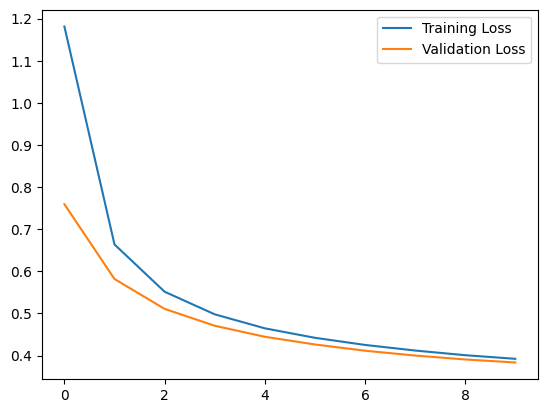

In [54]:
def plotter():
    plt.plot(training_losses, label='Training Loss')
    plt.plot(validation_losses, label='Validation Loss')
    plt.legend()
    plt.show()

plotter()

### Performance Analysis

#### Generating a Confusion Matrix

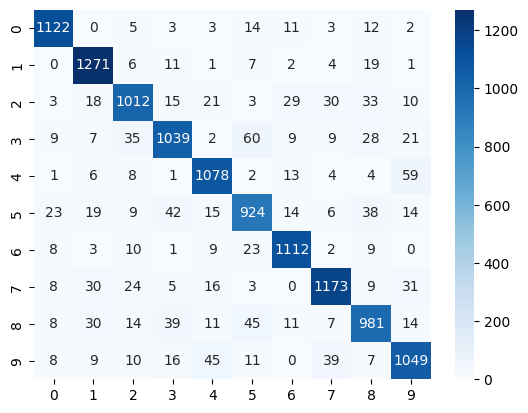

In [56]:
def confusion_matrix_generator(true_labels, predicted_labels):
    confusion = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))

confusion_matrix_generator(true_labels, predicted_labels)

### Parameter Analysis

#### Changing Learning Rates

#### Changing Batch Sizes

#### Adding L2 Regularisation

## Neural Network Modelling

### Model Implementation

### Training and Logging

### Visualisation and Plotting

## Analysis and Comparison

### Metrics for Comparison
1. **Final Test Accuracy**: The percentage of correctly classified images from the test dataset.
2. **Training Time**: The total time taken to train each model across all epochs.